# Vaje 5: Metoda podpornih vektorjev

## Naloga 1: Linearno jedro in parameter C (cena)

1.a: Pripravi umetne, linearno ločljive podatke z dvema napovednima spremenljivkama. Množica podatkov naj vsebuje 1000 točk in naj bo mešanica dveh normalnih porazdelitev; ene s centrom v -2 in druge s centrom v 2. Ciljna spremenljivka naj bo dvojiška, njeni vrednosti pa naj sovpadata z obema porazdelitvama. 

In [67]:
import numpy as np

In [68]:
# Podatki iz normalne porazdelitve z centrom v -2 ter njihove ciljne vrednosti (0) 
negative_examples = np.random.normal(-2, size=(500, 2))
negative_y = np.zeros(shape=(500,))

# Podatki iz normalne porazdelitve z centrom v 2 ter njihove ciljne vrednosti (1) 
positive_examples = np.random.normal(2, size=(500, 2))
positive_y = np.ones(shape=(500,))

# Združimo podatke
X = np.concatenate([positive_examples, negative_examples])
y = np.concatenate([positive_y, negative_y])

1.b: Podatke vizualiziraj s pomočjo metode `matplotlib.pyplot.scatter`. So podatki res linearno ločljivi?

In [69]:
import matplotlib.pyplot as plt

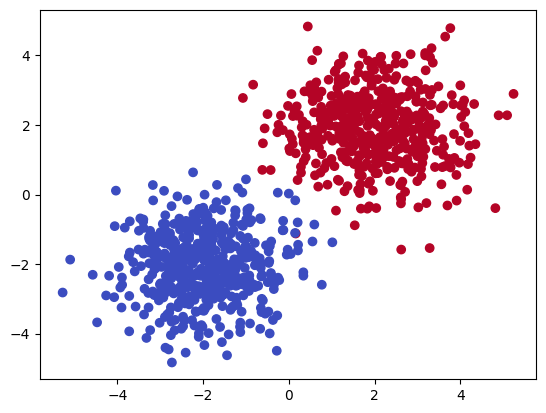

In [70]:
# Sestavimo graf in pobarvamo točke glede na njihove ciljne vrednosti (parameter c). S parametrom cmap spremenimo barve, ki jih bo graf uporabil 
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="coolwarm")
# Izrišemo graf
plt.show()

1.c: Natreniraj model podpornih vektorje z linearnim jedrom in oceni njegovo točnost.

<details>
  <summary>Namig:</summary>

  *Pomagaj si z [modelom sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
   
</details>

In [71]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [72]:
kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    # Poskrbimo, da bomo uporabili linearno jedro s parametrom kernel="linear"
    model = SVC(kernel="linear").fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {i}: accuracy {accuracy}")
    accuracies.append(accuracy)

print(np.mean(accuracies))

Fold 0: accuracy 0.99
Fold 1: accuracy 1.0
Fold 2: accuracy 0.995
Fold 3: accuracy 1.0
Fold 4: accuracy 0.995
0.9959999999999999


1.d: Natreniraj model podpornih vektorjev na vseh podatkih in vizualiziraj odločitveno krivuljo s pomočjo metode `vizualize_decision_boundery`. Je model uspel podatke pravilno ločiti.

In [1]:
def vizualize_decision_boundery(model, X, y):
    # Širina polja na narisanem grafu
    h = 0.02

    # Leve in desne meje na grafu
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Koordinate sredine polja, v katerem bomo izračunali vrednosti za ozadje grafa
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    # Napovemo vrednosti v poljih, ki na grafu predstavljajo ozadje
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Pobarvamo ozadje grafa
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Narišemo točke na grafu
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    
    # Določimo meje grafa
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

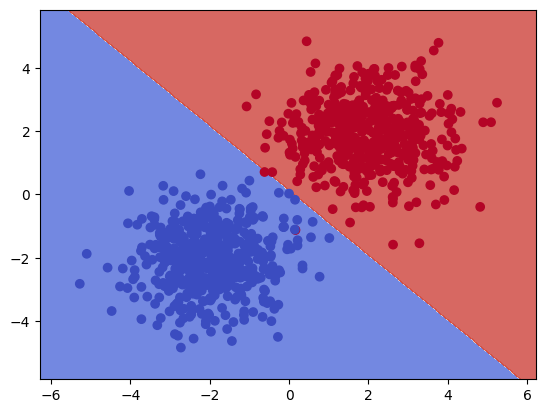

In [74]:
model = SVC(kernel="linear").fit(X, y)

vizualize_decision_boundery(model, X, y)

1.e: Podatkovni množici dodaj 50 točk, ki bodo vzorčeni iz normalne porazdelitve s centrom v [-10, 2]. Ciljna vrednost novih točk naj sovpada s ciljno vrednostjo točk iz porazdelitve s centrom v 2. 

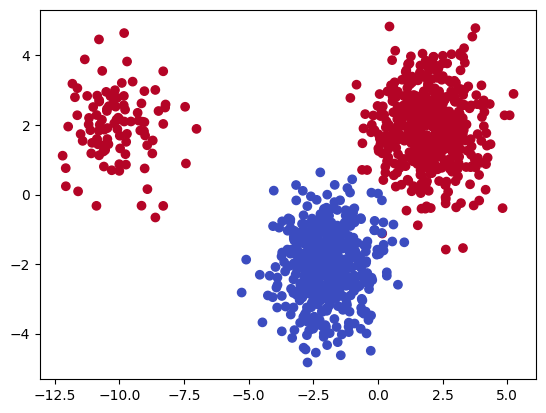

In [78]:
# Vzorčimo točke s centrom v [-10, 2]
outliers_x = np.random.normal([-10, 2], size=(50, 2))
outliers_y = np.ones(shape=(50,))

X = np.concatenate([X, outliers_x])
y = np.concatenate([y, outliers_y])

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="coolwarm")
plt.show()

1.f: Preveri točnost modela podpornih vektorjev za različno vrednost parametra C.

In [79]:
# Gremo čez različne vrednosti parametra C
# Velikokrat se splača za začetno oceno uporabiti vrednosti, ki naraščajo eksponentno
for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    np.random.seed(42)
    
    kfold = KFold(shuffle=True)
    accuracies = []

    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        y_train = y[train_idx]
        x_test = X[test_idx]
        y_test = y[test_idx]
        # Modelu nastavimo linearno jedro in vrednost parametra C
        model = SVC(kernel="linear", C=c).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    print(f"Cost parameter {c}, accuracy: {np.mean(accuracies)}")

Cost parameter 0.001, accuracy: 0.9754545454545454
Cost parameter 0.01, accuracy: 0.9745454545454546
Cost parameter 0.1, accuracy: 0.9709090909090909
Cost parameter 1, accuracy: 0.9718181818181819
Cost parameter 10, accuracy: 0.97
Cost parameter 100, accuracy: 0.9709090909090909


1.g: Vizualiziraj odločitveno krivuljo za različne vrednosti parametra C. Se krivulja spremeni med različnimi vrednostmi. Če se, kakšna je ta sprememba?

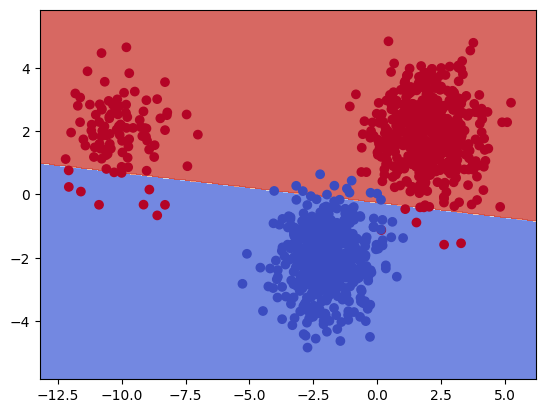

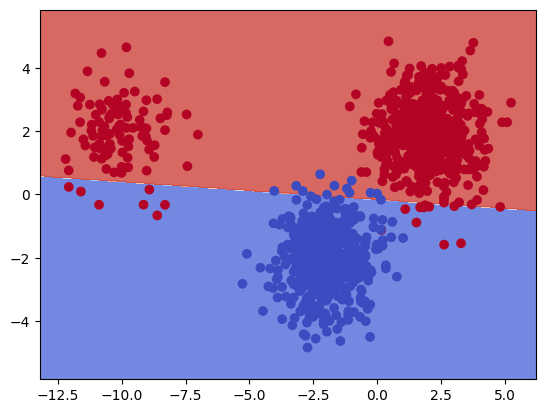

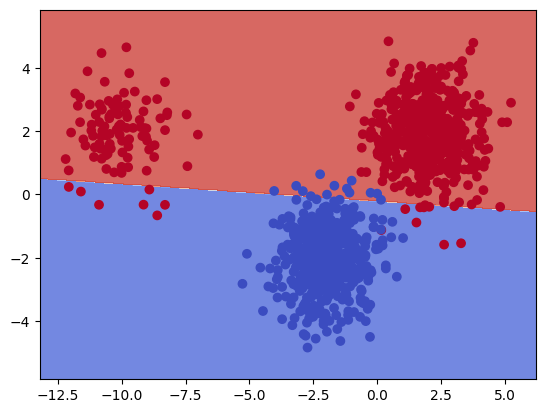

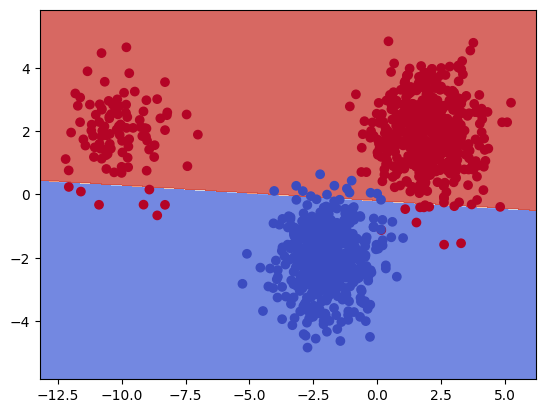

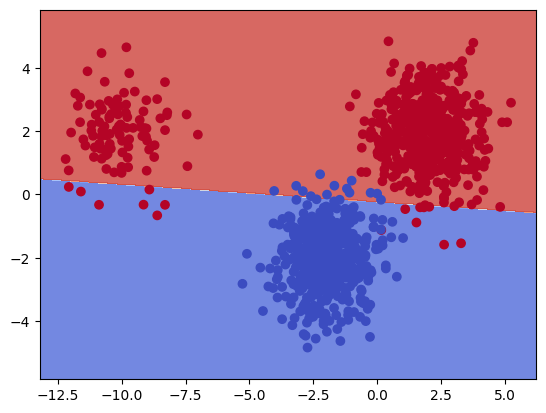

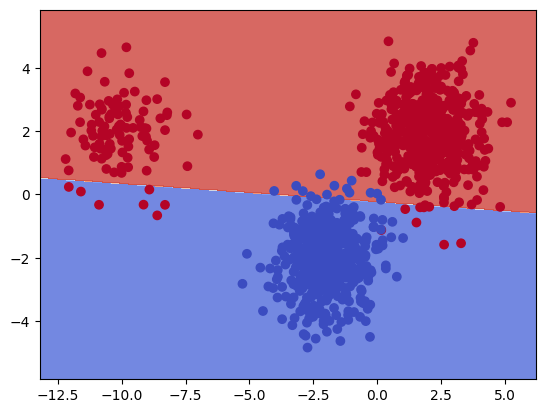

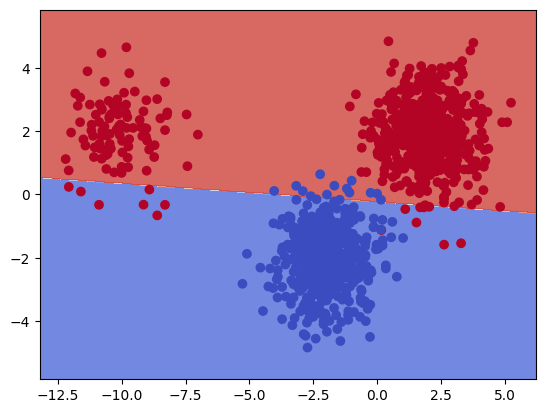

In [80]:
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = SVC(kernel="linear", C=c).fit(X, y)
    vizualize_decision_boundery(model, X, y)
    
# Vidimo lahko, da ima krivulja pri večjih vrednostih parametra C v našem primeru manjši naklon

## Naloga 2: Različna jedra

2.a: Poglejmo primer podatkov, ki niso ločljivi linearno. Sestavi podatkovno množico, kjer bodo podatki razdeljeni v dva koncentrična kroga. Radij naj bo vzorčen iz mešanice dveh normalinih porazdelitev s centri v 2 in 4, ter standardno deviacijo 0.3, kot pa naj bo porazdeljen enakomerno med 0 in 1. Podatke tudi vizualiziraj.

<details>
  <summary>Namig:</summary>
  *Podatke o radiju in kotu ne pozabi pretvoriti v evklidski koordinatni sistem.*
</details>

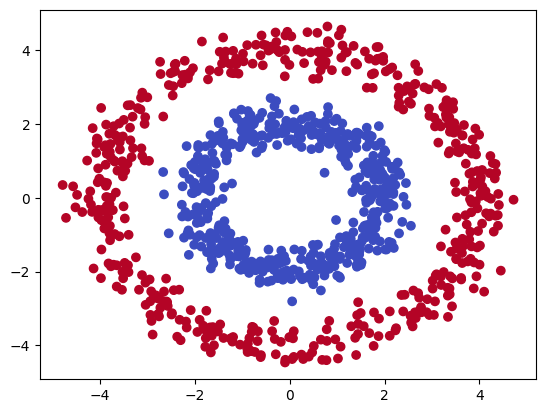

In [87]:
# Vzorčimo vrednosti iz normalne in enakomerne porazdelitve
negative_radius = np.random.normal(2, scale=0.3, size=(500))
negative_theta = np.random.random(size=(500))
negative_y = np.zeros(shape=(500,))

positive_radius = np.random.normal(4, scale=0.3, size=(500))
positive_theta = np.random.random(size=(500))
positive_y = np.ones(shape=(500,))

# Združimo podatke o radiju, kotu in ciljni vrednosti
sampled_radius = np.concatenate([positive_radius, negative_radius])
sampled_theta = np.concatenate([positive_theta, negative_theta])
y = np.concatenate([positive_y, negative_y])

# Nastavimo array v katerega bomo koordinate x in y shranjevali in koordinate izračunamo
X = np.zeros((1000, 2))
X[:, 0] = sampled_radius * np.cos(2*np.pi*sampled_theta)
X[:, 1] = sampled_radius * np.sin(2*np.pi*sampled_theta)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="coolwarm")
plt.show()

2.b: Preveri točnost modela podpornih vektorjev z linearnim jedrom in vizualiziraj odločitveno krivuljo. Je uporaba tega jedra primerna za dane podatke?

Fold 0: accuracy 0.55
Fold 1: accuracy 0.485
Fold 2: accuracy 0.44
Fold 3: accuracy 0.55
Fold 4: accuracy 0.485
0.502


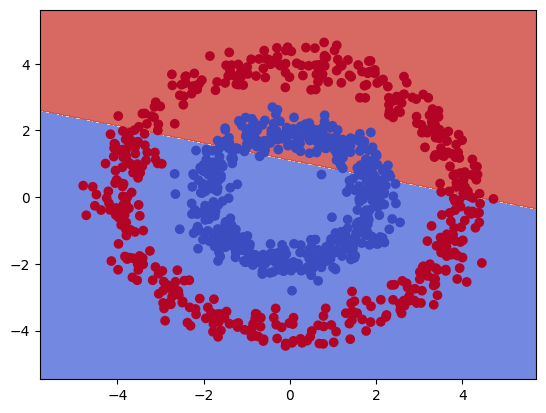

In [88]:
kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    model = SVC(kernel="linear").fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {i}: accuracy {accuracy}")
    accuracies.append(accuracy)

print(np.mean(accuracies))

model = SVC(kernel="linear").fit(X, y)

vizualize_decision_boundery(model, X, y)

1.c: 2.b: Preveri točnost modela podpornih vektorjev z polinomskim jedrom različnih stopenj (npr. 1-5). Za vsako vizualiziraj odločitveno krivuljo. Je uporaba tega jedra bolj primerna za dane podatke? Katere stopnje delujejo boljse in katere slabše?

Fold 0 degree 1: accuracy 0.48
Fold 1 degree 1: accuracy 0.44
Fold 2 degree 1: accuracy 0.52
Fold 3 degree 1: accuracy 0.425
Fold 4 degree 1: accuracy 0.495
0.472


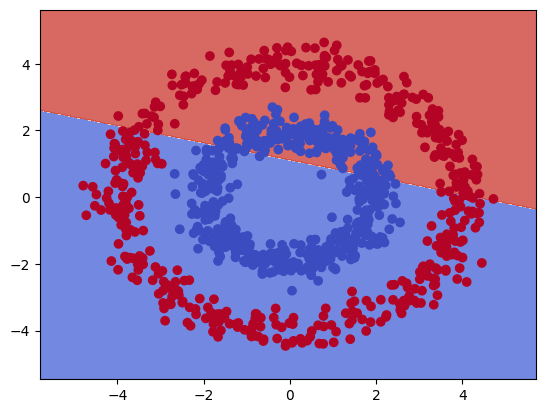

Fold 0 degree 2: accuracy 1.0
Fold 1 degree 2: accuracy 1.0
Fold 2 degree 2: accuracy 1.0
Fold 3 degree 2: accuracy 1.0
Fold 4 degree 2: accuracy 1.0
1.0


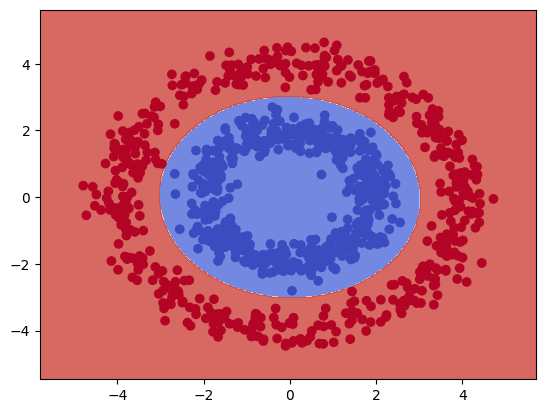

Fold 0 degree 3: accuracy 0.625
Fold 1 degree 3: accuracy 0.66
Fold 2 degree 3: accuracy 0.54
Fold 3 degree 3: accuracy 0.425
Fold 4 degree 3: accuracy 0.685
0.587


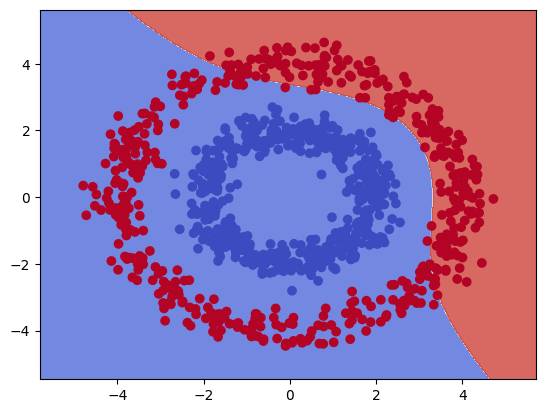

Fold 0 degree 4: accuracy 1.0
Fold 1 degree 4: accuracy 1.0
Fold 2 degree 4: accuracy 1.0
Fold 3 degree 4: accuracy 1.0
Fold 4 degree 4: accuracy 1.0
1.0


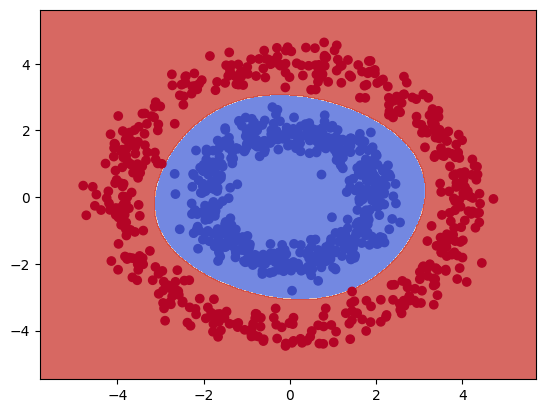

Fold 0 degree 5: accuracy 0.615
Fold 1 degree 5: accuracy 0.595
Fold 2 degree 5: accuracy 0.615
Fold 3 degree 5: accuracy 0.235
Fold 4 degree 5: accuracy 0.615
0.5349999999999999


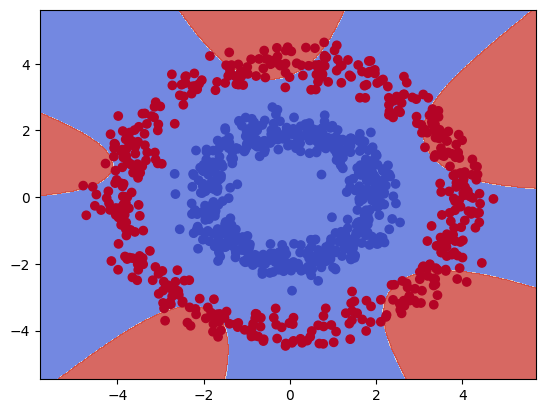

In [89]:
for j in range(1, 6):
    np.random.seed(42)
    kfold = KFold(shuffle=True)
    accuracies = []

    for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
        x_train = X[train_idx]
        y_train = y[train_idx]
        x_test = X[test_idx]
        y_test = y[test_idx]
        # Spremenimo jedro modela in stopnjo polinoma (parameter degree)
        model = SVC(kernel="poly", degree=j).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Fold {i} degree {j}: accuracy {accuracy}")
        accuracies.append(accuracy)

    print(np.mean(accuracies))

    model = SVC(kernel="poly", degree=j).fit(X, y)
    vizualize_decision_boundery(model, X, y)

1.d: Preveri še točnost modela, ki ima jedrom iz radialnih baznih funkcij ("rbf" v paketu sklearn).

Fold 0: accuracy 1.0
Fold 1: accuracy 1.0
Fold 2: accuracy 1.0
Fold 3: accuracy 1.0
Fold 4: accuracy 1.0
1.0


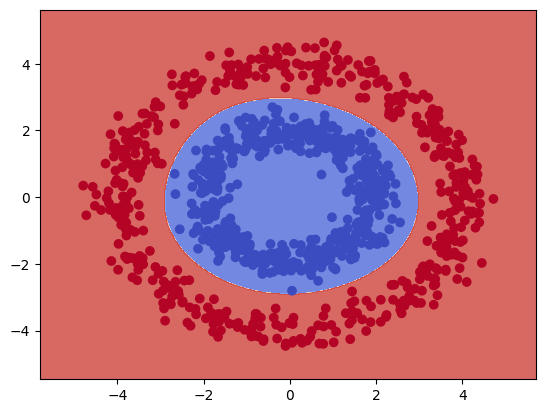

In [90]:
kfold = KFold(shuffle=True)
accuracies = []

for i, (train_idx, test_idx) in enumerate(kfold.split(X)):
    x_train = X[train_idx]
    y_train = y[train_idx]
    x_test = X[test_idx]
    y_test = y[test_idx]
    # Definiramo model z jedrom iz radialnih baznih funkcij (rbf)
    model = SVC(kernel="rbf").fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {i}: accuracy {accuracy}")
    accuracies.append(accuracy)

print(np.mean(accuracies))

model = SVC(kernel="rbf").fit(X, y)
vizualize_decision_boundery(model, X, y)

2.e: Pripravi novo podatkovno množico, v kateri podatki prihajajo iz istih porazdelitev kot v nalogi 2.a, a s standardno deviacijo 2.

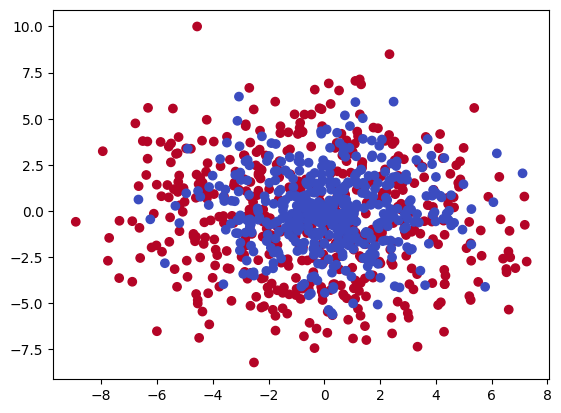

In [91]:
negative_radius = np.random.normal(2, scale=2, size=(500))
negative_theta = np.random.random(size=(500))
negative_y = np.zeros(shape=(500,))

positive_radius = np.random.normal(4, scale=2, size=(500))
positive_theta = np.random.random(size=(500))
positive_y = np.ones(shape=(500,))

sampled_radius = np.concatenate([positive_radius, negative_radius])
sampled_theta = np.concatenate([positive_theta, negative_theta])
y = np.concatenate([positive_y, negative_y])

X = np.zeros((1000, 2))
X[:, 0] = sampled_radius * np.cos(2*np.pi*sampled_theta)
X[:, 1] = sampled_radius * np.sin(2*np.pi*sampled_theta)

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap="coolwarm")
plt.show()

2.f: Na novih podatkih poišči najboljši SVM model. Preizkusi različna jedra in vrednosti parametra C